<a href="https://colab.research.google.com/github/hyojun121/final/blob/suyeon/%ED%8C%8C%EC%9D%BC_%ED%95%A9%EC%B9%98%EA%B8%B0_%2B_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import gc

import os
import json
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

### 준비
- open 이라는 이름의 데이터 파일을 현재 ipynb 파일과 같은 위치에 넣어준다.
- MyDrive에 파일 넣고 마운트 하여 파일 경로가 /content/drive/MyDrive로 시작하는 것을 권장
- 그러면 아래 코드에서 오류가 나지 않을것임



## ⭐️중요⭐️

train과 test데이터 에서 📁청구입금정보 --> 📁청구정보 로 파일 이름 변경한다

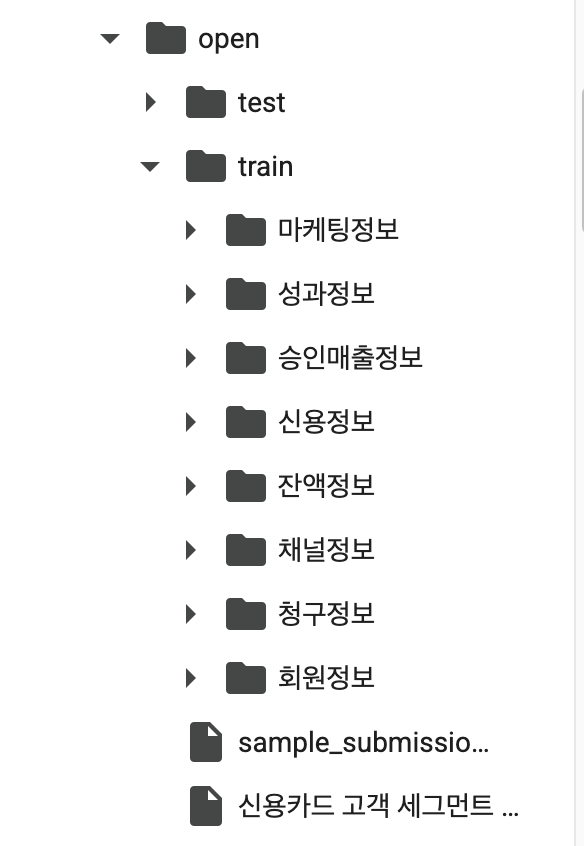

### 데이터 합치기

In [ ]:
months = ["07", "08", "09", "10", "11", "12"]

def merge_monthly_data(data_type, category):
    merged_list = []
    for month in months:
        file_name = f"/content/drive/MyDrive/open/{data_type}/{category}/2018{month}_{data_type}_{category}.parquet"
        try:
            df = pd.read_parquet(file_name, engine="pyarrow")
            merged_list.append(df)
            print(f"✅ {file_name} 변환 완료")
        except FileNotFoundError:
            print(f"⚠️ 파일 없음: {file_name}")
    if merged_list:
        merged_df = pd.concat(merged_list, ignore_index=True)
        output_file = f"/content/drive/MyDrive/open/{data_type}/{category}/{data_type}_{category}.csv"
        merged_df.to_csv(output_file, index=False)
        print(f"✅ {output_file} 저장 완료 (Shape: {merged_df.shape})")
        # 메모리 해제
        del merged_list, merged_df
        gc.collect()
    else:
        print(f"❌ {data_type}_{category} 데이터 없음")

In [ ]:
# ==== 카테고리: 회원정보 ====
merge_monthly_data("train", "회원정보")
merge_monthly_data("test",  "회원정보")

In [ ]:
# ==== 카테고리: 신용정보 ====
merge_monthly_data("train", "신용정보")
merge_monthly_data("test",  "신용정보")

In [ ]:
# ==== 카테고리: 승인매출정보 ====
merge_monthly_data("train", "승인매출정보")
merge_monthly_data("test",  "승인매출정보")

✅ /content/drive/MyDrive/open/train/승인매출정보/201807_train_승인매출정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/승인매출정보/201808_train_승인매출정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/승인매출정보/201809_train_승인매출정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/승인매출정보/201810_train_승인매출정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/승인매출정보/201811_train_승인매출정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/승인매출정보/201812_train_승인매출정보.parquet 변환 완료


In [ ]:
==== 카테고리: 청구입금정보 ====
merge_monthly_data("train", "청구정보")
merge_monthly_data("test",  "청구정보")

✅ /content/drive/MyDrive/open/train/청구정보/201807_train_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/청구정보/201808_train_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/청구정보/201809_train_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/청구정보/201810_train_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/청구정보/201811_train_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/청구정보/201812_train_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/청구정보/train_청구정보.csv 저장 완료 (Shape: (2400000, 46))
✅ /content/drive/MyDrive/open/test/청구정보/201807_test_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/청구정보/201808_test_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/청구정보/201809_test_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/청구정보/201810_test_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/청구정보/201811_test_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/청구정보/201812_test_청구정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/청구정보/test_청구정보.c

In [ ]:
# ==== 카테고리: 잔액정보 ====
merge_monthly_data("train", "잔액정보")
merge_monthly_data("test",  "잔액정보")

In [ ]:
# ==== 카테고리: 채널정보 ====
merge_monthly_data("train", "채널정보")
merge_monthly_data("test",  "채널정보")

✅ /content/drive/MyDrive/open/train/채널정보/201807_train_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/채널정보/201808_train_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/채널정보/201809_train_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/채널정보/201810_train_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/채널정보/201811_train_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/채널정보/201812_train_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/채널정보/train_채널정보.csv 저장 완료 (Shape: (2400000, 105))
✅ /content/drive/MyDrive/open/test/채널정보/201807_test_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/채널정보/201808_test_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/채널정보/201809_test_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/채널정보/201810_test_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/채널정보/201811_test_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/채널정보/201812_test_채널정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/채널정보/test_채널정보.

In [ ]:
==== 카테고리: 마케팅정보 ====
merge_monthly_data("train", "마케팅정보")
merge_monthly_data("test",  "마케팅정보")

✅ /content/drive/MyDrive/open/train/마케팅정보/201807_train_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/마케팅정보/201808_train_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/마케팅정보/201809_train_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/마케팅정보/201810_train_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/마케팅정보/201811_train_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/마케팅정보/201812_train_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/마케팅정보/train_마케팅정보.csv 저장 완료 (Shape: (2400000, 64))
✅ /content/drive/MyDrive/open/test/마케팅정보/201807_test_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/마케팅정보/201808_test_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/마케팅정보/201809_test_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/마케팅정보/201810_test_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/마케팅정보/201811_test_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/마케팅정보/201812_test_마케팅정보.parquet 변환 완료
✅ /content/drive/MyDrive/

In [ ]:
==== 카테고리: 성과정보 ====
merge_monthly_data("train", "성과정보")
merge_monthly_data("test",  "성과정보")

✅ /content/drive/MyDrive/open/train/성과정보/201807_train_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/성과정보/201808_train_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/성과정보/201809_train_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/성과정보/201810_train_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/성과정보/201811_train_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/성과정보/201812_train_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/train/성과정보/train_성과정보.csv 저장 완료 (Shape: (2400000, 49))
✅ /content/drive/MyDrive/open/test/성과정보/201807_test_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/성과정보/201808_test_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/성과정보/201809_test_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/성과정보/201810_test_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/성과정보/201811_test_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/성과정보/201812_test_성과정보.parquet 변환 완료
✅ /content/drive/MyDrive/open/test/성과정보/test_성과정보.c

In [ ]:
import pandas as pd
import glob, os, gc

# 1) 병합할 폴더 경로 리스트
folders = [
    "/content/drive/MyDrive/open/train/회원정보",
    "/content/drive/MyDrive/open/train/신용정보",
    "/content/drive/MyDrive/open/train/승인매출정보",
    "/content/drive/MyDrive/open/train/청구정보",
    "/content/drive/MyDrive/open/train/잔액정보",
    "/content/drive/MyDrive/open/train/채널정보",
    "/content/drive/MyDrive/open/train/마케팅정보",
    "/content/drive/MyDrive/open/train/성과정보"
]

# 2) 각 폴더에서 CSV 경로만 뽑아둡니다.
file_paths = []
for folder in folders:
    matches = glob.glob(os.path.join(folder, "*.csv"))
    if not matches:
        raise FileNotFoundError(f"폴더에 CSV가 없습니다: {folder}")
    # 폴더당 하나만 사용한다고 가정
    file_paths.append(matches[0])

# 3) 첫 번째 CSV로 베이스 DataFrame 생성
print("▶️ 기준 DataFrame 로드:", os.path.basename(file_paths[0]))
base_df = pd.read_csv(file_paths[0], usecols=["ID", "기준년월"] +
                      # 메모리 절약을 위해 꼭 필요한 컬럼만 골라 쓰세요
                      [c for c in pd.read_csv(file_paths[0], nrows=0).columns
                       if c not in ("ID","기준년월")])
print("   shape:", base_df.shape)

# 4) 나머지 CSV 순차 병합 (메모리 해제 포함)
for path in file_paths[1:]:
    print(f"🔄 병합 중: {os.path.basename(path)}")
    tmp = pd.read_csv(path)  # 필요하다면 usecols로 컬럼을 줄이세요
    base_df = base_df.merge(tmp, how="left", on=["ID", "기준년월"])
    print("   → 현재 shape:", base_df.shape)
    # 임시 객체 해제
    del tmp
    gc.collect()

# 5) 완성된 base_df 사용
print("\n🎉 최종 통합 DataFrame 크기:", base_df.shape)
# 원하면 이 시점에 바로 분석/모델링에 넘기시면 됩니다.


▶️ 기준 DataFrame 로드: train_회원정보.csv
   shape: (2400000, 78)
🔄 병합 중: train_신용정보.csv
   → 현재 shape: (2400000, 118)
🔄 병합 중: train_청구정보.csv
   → 현재 shape: (2400000, 162)
🔄 병합 중: train_잔액정보.csv


### 데이터 전처리

In [ ]:
# 데이터 원본 보존을 위해 copy
train = base_df.copy()

In [ ]:
# 전혀 필요없는 데이터는 제외할거면 하고 (ex. 결측치가 너무 많은 칼럼)
# 아니면 그냥 돌리면 될듯

In [ ]:
df.isna().sum().to_list()
# 결측치 처리 논의 필요 !!

In [ ]:
# x, y 나누기
X = df.drop('Segment', axis = 1)
y = df['Segment']

In [ ]:
# 데이터 라벨링
# 문자열 -> 숫자
# 원핫 인코딩
X = pd.get_dummies(X)
y = pd.get_dumimes(y)

In [ ]:
# 입력 데이터 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X2 = scaler1.transform(X)

In [ ]:
# 학습할 데이터를 변수에 담아준다.
train_X = X2
train_y = y2